In [1]:
import pandas as pd

In [2]:
#import and read volume v pressure data

df = pd.read_csv('volume_pressure_data.csv')
print(df)

    Volume  Pressure
0       48   29.1250
1       46   30.5625
2       44   31.9375
3       42   33.5000
4       40   35.3125
5       38   37.0000
6       36   39.3125
7       34   41.6250
8       32   44.1875
9       30   47.0625
10      28   50.3125
11      26   54.3125
12      24   58.8125
13      23   61.3125
14      22   64.0625
15      21   67.0625
16      20   70.6875
17      19   74.1250
18      18   77.8750
19      17   82.7500
20      16   87.8750
21      15   93.0625
22      14  100.4375
23      13  107.8125
24      12  117.5625


In [3]:
print(df.mean())
print(df.median())
print(df.std())

Volume      27.1200
Pressure    61.5075
dtype: float64
Volume      24.0000
Pressure    58.8125
dtype: float64
Volume      11.192706
Pressure    25.840546
dtype: float64


In [4]:
import matplotlib.pyplot as plt

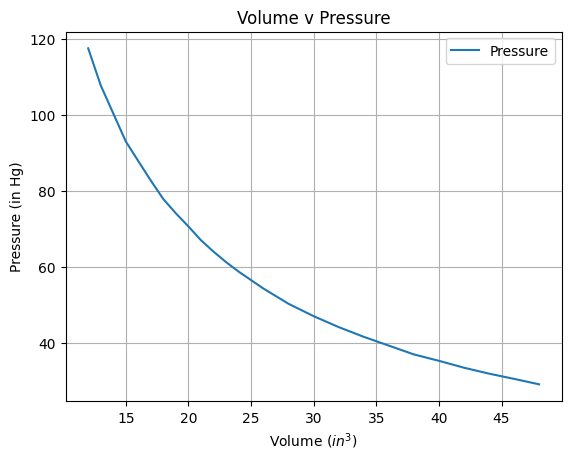

In [5]:
#plot volume x pressure relationship

df.plot(kind = 'line', x = 'Volume', y = 'Pressure')
plt.xlabel('Volume ($in^3$)')
plt.ylabel('Pressure (in Hg)')
plt.title('Volume v Pressure')
plt.grid()
plt.show()

In [6]:
import numpy as np

In [7]:
#fit a 2nd-degree polynomial to the volume v pressure data

coeff_2nd = np.polyfit(df['Volume'], df['Pressure'], 2)
print(coeff_2nd)

[ 8.11467652e-02 -6.93261665e+00  1.80077908e+02]


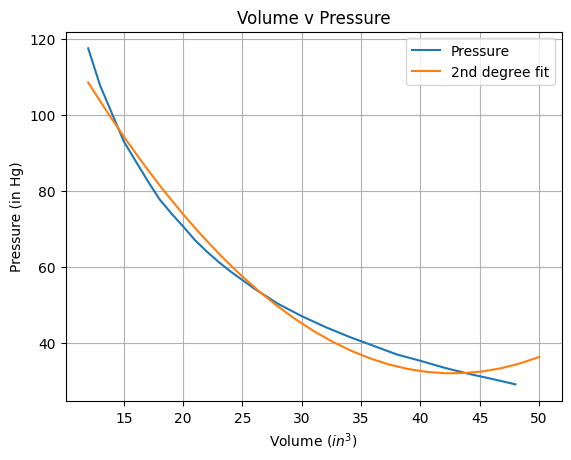

In [8]:
#plot the fit to the volume v pressure curve

df.plot(kind = 'line', x = 'Volume', y = 'Pressure')
x_fit_2nd = np.linspace(12,50,25)
y_fit_2nd = np.polyval(coeff_2nd, x_fit_2nd)
plt.plot(x_fit_2nd, y_fit_2nd, label = '2nd degree fit')
plt.xlabel('Volume ($in^3$)')
plt.ylabel('Pressure (in Hg)')
plt.title('Volume v Pressure')
plt.grid()
plt.legend()
plt.show()

[ 4.98548131e-10 -1.35387278e-07  1.57790341e-05 -1.03122075e-03
  4.14076319e-02 -1.05126409e+00  1.66899331e+01 -1.57032250e+02
  7.70626483e+02]


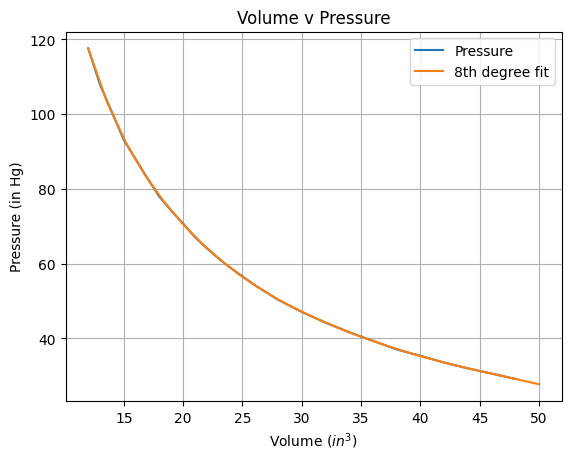

In [10]:
#create an 8th-degree polynomial fit and plot the fit on the volume v pressure curve

coeff = np.polyfit(df['Volume'], df['Pressure'],8)
print(coeff)

df.plot(kind = 'line', x = 'Volume', y = 'Pressure')
x_fit_8th = np.linspace(12,50,25)
y_fit_8th = np.polyval(coeff, x_fit_8th)
plt.plot(x_fit_8th, y_fit_8th, label = '8th degree fit')
plt.xlabel('Volume ($in^3$)')
plt.ylabel('Pressure (in Hg)')
plt.title('Volume v Pressure')
plt.grid()
plt.legend()
plt.show()

In [ ]:
###curve equation: (4.98548131e-10)x^8 + (-1.35387278e-07)x^7 + (1.57790341e-05)x^6 + (-1.03122075e-03)x^5 + (4.14076319e-02)x^4 + (-1.05126409)x^3 + (16.68993)x^2 + (-157.03)x + (770.62)

#Given that PV = constant for ideal gases, pressure should have an inverse relationship with volume, i.e. P = constant / V. 
# Higher-order polynomials should fit this data better than a quadratic term because they have more terms that can deal w/ variations in ideal gas behavior. This is why equations like the virial equation of state are more accurate than the ideal gas. 

In [ ]:
#calculating the RMSE between the fitted polynomials and the actual data

actual_data = df['Pressure']

rmse_8th = np.sqrt(np.mean((actual_data - y_fit_8th) ** 2))

rmse_2nd = np.sqrt(np.mean((actual_data - y_fit_2nd) ** 2))

print(rmse_8th, rmse_2nd)



48.274852639424374 47.383868472122174


In [ ]:
#The RMSE between the 8th degree fitted polynomial and the actual data is larger than the RMSE between the 2nd degree polynomial and the actual data.
